In [1]:
!pip install opencv-python matplotlib scikit-learn

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.cluster import KMeans
from google.colab import files

In [3]:
uploaded = files.upload()

Saving terang.jpg to terang (1).jpg
Saving redup.jpg to redup (1).jpg
Saving normal.jpeg to normal (1).jpeg


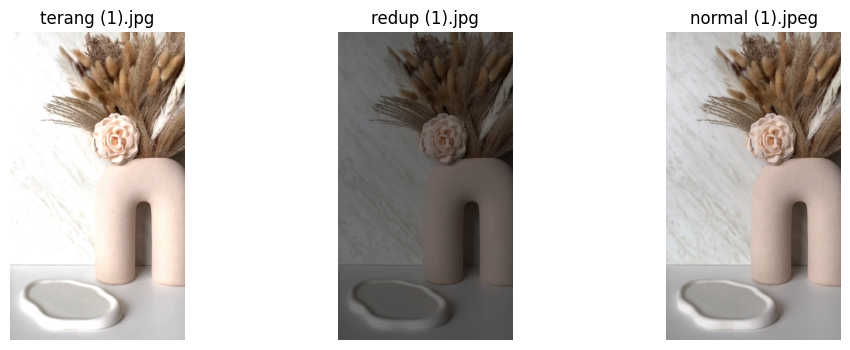

In [4]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

images = {}

for name in uploaded.keys():
    images[name] = load_image(name)

plt.figure(figsize=(12,4))
for i,(name,img) in enumerate(images.items()):
    plt.subplot(1,len(images),i+1)
    plt.imshow(img)
    plt.title(name)
    plt.axis("off")
plt.show()

In [5]:
def convert_color(img):

    start = time.time()

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    lab = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)

    end = time.time()

    return gray, hsv, lab, end-start

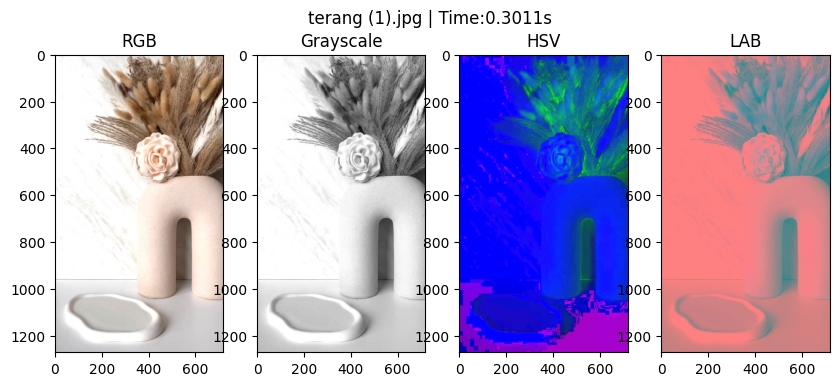

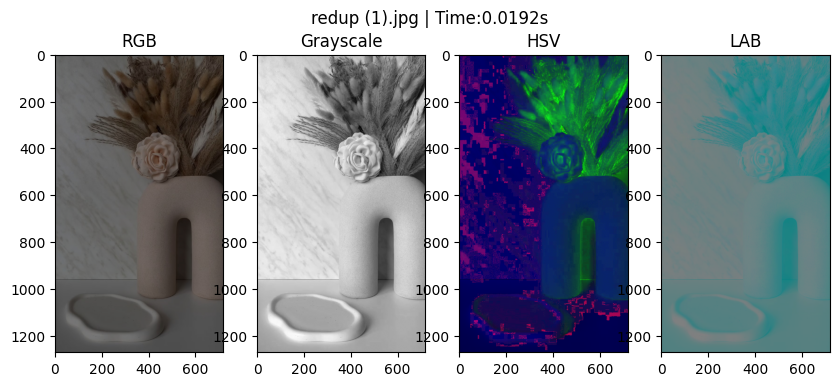

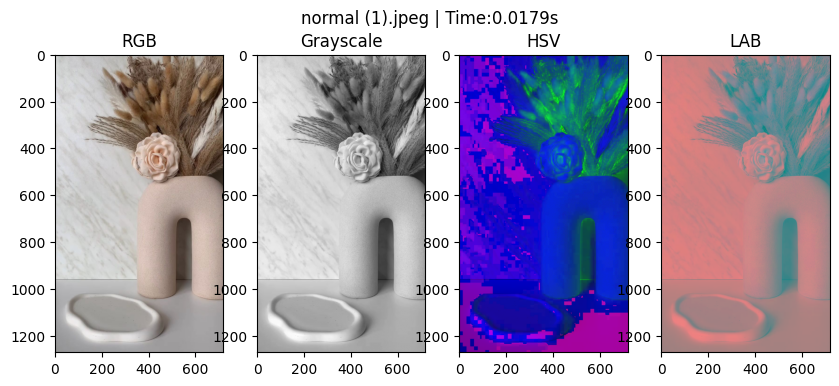

In [6]:
for name,img in images.items():

    gray, hsv, lab, t = convert_color(img)

    plt.figure(figsize=(10,4))

    plt.subplot(1,4,1)
    plt.imshow(img)
    plt.title("RGB")

    plt.subplot(1,4,2)
    plt.imshow(gray,cmap='gray')
    plt.title("Grayscale")

    plt.subplot(1,4,3)
    plt.imshow(hsv)
    plt.title("HSV")

    plt.subplot(1,4,4)
    plt.imshow(lab)
    plt.title("LAB")

    plt.suptitle(f"{name} | Time:{t:.4f}s")
    plt.show()

In [7]:
def uniform_quantization(img, level=16):
    step = 256 // level
    quantized = (img // step) * step
    return quantized

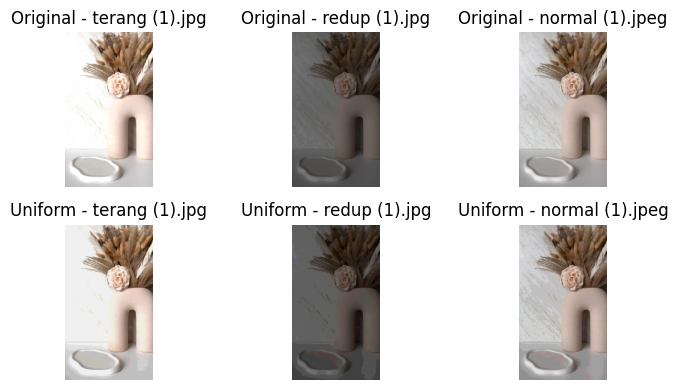

In [8]:
n = len(images)

plt.figure(figsize=(8,4))

for i, (name, img) in enumerate(images.items()):
    uq = uniform_quantization(img)

    plt.subplot(2, n, i+1)
    plt.imshow(img)
    plt.title(f"Original - {name}")
    plt.axis('off')

    plt.subplot(2, n, i+1+n)
    plt.imshow(uq)
    plt.title(f"Uniform - {name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
def kmeans_quantization(img, k=16):

    data = img.reshape((-1,3))

    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(data)

    centers = kmeans.cluster_centers_.astype(np.uint8)
    quantized = centers[labels]

    return quantized.reshape(img.shape)

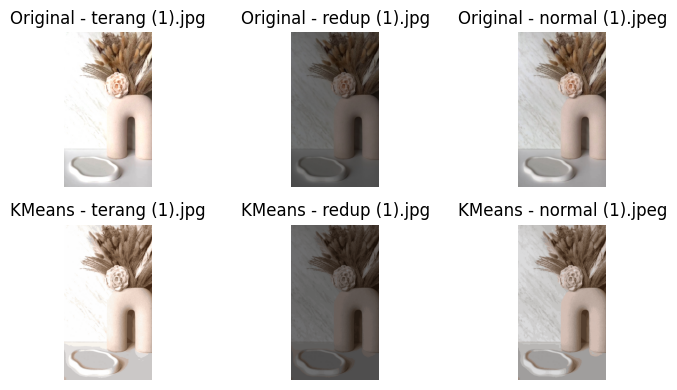

In [10]:
n = len(images)

plt.figure(figsize=(8,4))

for i, (name, img) in enumerate(images.items()):
    kq = kmeans_quantization(img)

    plt.subplot(2, n, i+1)
    plt.imshow(img)
    plt.title(f"Original - {name}")
    plt.axis('off')

    plt.subplot(2, n, i+1+n)
    plt.imshow(kq)
    plt.title(f"KMeans - {name}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [11]:
quantized_images = {}

for name, img in images.items():

    quantized = (img // 64) * 64

    quantized_images[name] = quantized.astype('uint8')

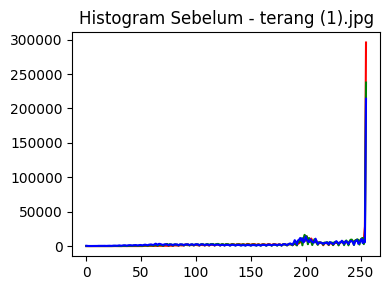

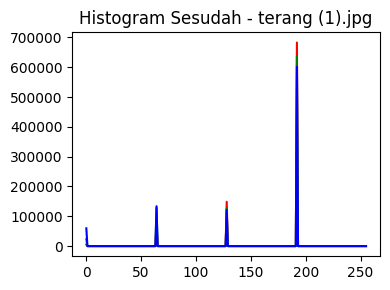

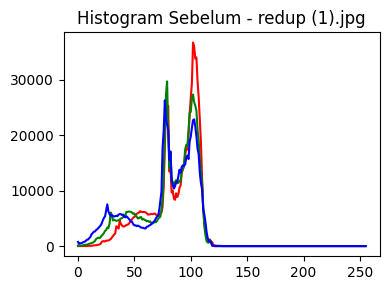

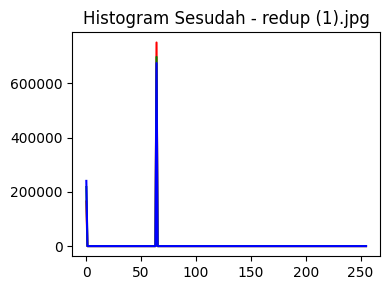

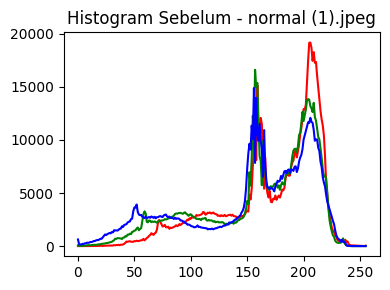

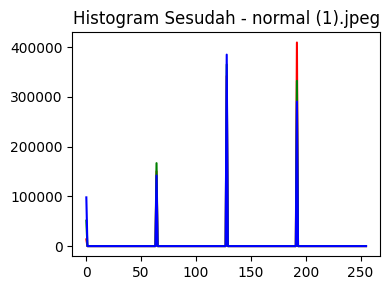

In [12]:
def show_histogram(img, title):
    plt.figure(figsize=(4,3))
    colors = ('r','g','b')

    for i, c in enumerate(colors):
        hist = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(hist, color=c)

    plt.title(title)
    plt.tight_layout()
    plt.show()

for name in images.keys():

    show_histogram(
        images[name],
        f"Histogram Sebelum - {name}"
    )

    show_histogram(
        quantized_images[name],
        f"Histogram Sesudah - {name}"
    )

In [13]:
for name, img in images.items():
    print("\nNama Gambar:", name)
    print(img[0:3, 0:3])


Nama Gambar: terang (1).jpg
[[[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]]]

Nama Gambar: redup (1).jpg
[[[102 102 100]
  [102 102 100]
  [103 103 101]]

 [[103 103 101]
  [104 104 102]
  [104 104 102]]

 [[104 104 102]
  [105 105 103]
  [105 105 103]]]

Nama Gambar: normal (1).jpeg
[[[204 206 201]
  [205 207 202]
  [207 209 204]]

 [[207 209 204]
  [208 210 205]
  [209 211 206]]

 [[209 211 206]
  [210 212 207]
  [211 213 208]]]


In [14]:
for name, img in images.items():
    uq = uniform_quantization(img)

    print("\nSetelah Kuantisasi -", name)
    print(uq[0:3,0:3])


Setelah Kuantisasi - terang (1).jpg
[[[240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]]

 [[240 240 240]
  [240 240 240]
  [240 240 240]]]

Setelah Kuantisasi - redup (1).jpg
[[[96 96 96]
  [96 96 96]
  [96 96 96]]

 [[96 96 96]
  [96 96 96]
  [96 96 96]]

 [[96 96 96]
  [96 96 96]
  [96 96 96]]]

Setelah Kuantisasi - normal (1).jpeg
[[[192 192 192]
  [192 192 192]
  [192 208 192]]

 [[192 208 192]
  [208 208 192]
  [208 208 192]]

 [[208 208 192]
  [208 208 192]
  [208 208 208]]]


In [15]:
def image_memory(img):
    return img.nbytes/1024  # KB

for name,img in images.items():

    uq = uniform_quantization(img)
    kq = kmeans_quantization(img)

    print(f"\n{name}")
    print("Original :",image_memory(img),"KB")
    print("Uniform  :",image_memory(uq),"KB")
    print("KMeans   :",image_memory(kq),"KB")


terang (1).jpg
Original : 2683.125 KB
Uniform  : 2683.125 KB
KMeans   : 2683.125 KB

redup (1).jpg
Original : 2683.125 KB
Uniform  : 2683.125 KB
KMeans   : 2683.125 KB

normal (1).jpeg
Original : 2683.125 KB
Uniform  : 2683.125 KB
KMeans   : 2683.125 KB


In [16]:
def compression_ratio(original,compressed):
    return original/compressed

for name,img in images.items():

    uq = uniform_quantization(img)

    r = compression_ratio(
        image_memory(img),
        image_memory(uq)
    )

    print(name,"Compression Ratio:",r)

terang (1).jpg Compression Ratio: 1.0
redup (1).jpg Compression Ratio: 1.0
normal (1).jpeg Compression Ratio: 1.0


In [17]:
for name,img in images.items():

    start=time.time()
    uniform_quantization(img)
    t1=time.time()-start

    start=time.time()
    kmeans_quantization(img)
    t2=time.time()-start

    print(f"\n{name}")
    print("Uniform Time:",t1)
    print("KMeans Time:",t2)


terang (1).jpg
Uniform Time: 0.0016071796417236328
KMeans Time: 2.0088868141174316

redup (1).jpg
Uniform Time: 0.0011434555053710938
KMeans Time: 1.6214725971221924

normal (1).jpeg
Uniform Time: 0.0011827945709228516
KMeans Time: 2.111166477203369
